In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

ID = df_test.Id

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      30860 non-null  int64  
 1   Week    30860 non-null  int64  
 2   V1      30812 non-null  float64
 3   V2      30812 non-null  float64
 4   V3      23760 non-null  float64
 5   V4      23760 non-null  float64
 6   V5      23760 non-null  float64
 7   V6      23760 non-null  float64
 8   V7      23760 non-null  float64
 9   V8      23760 non-null  float64
 10  V9      23760 non-null  float64
 11  V10     23760 non-null  float64
 12  V11     23760 non-null  float64
 13  V12     23760 non-null  float64
 14  V13     23760 non-null  float64
 15  V14     23760 non-null  float64
 16  V15     23760 non-null  float64
 17  V16     23760 non-null  float64
 18  V17     23760 non-null  float64
 19  V18     23760 non-null  float64
 20  V19     23760 non-null  float64
 21  V20     23760 non-null  float64
 22

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


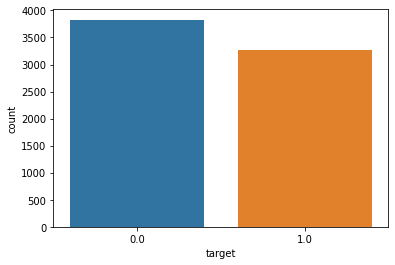

In [ ]:
is_NaN = df_train.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_train[row_has_NaN]

sns.countplot(rows_with_NaN.target)

In [ ]:
knn_im = KNNImputer()
df_train = pd.DataFrame(knn_im.fit_transform(df_train),columns = df_train.columns)
df_test = pd.DataFrame(knn_im.fit_transform(df_test),columns = df_test.columns)

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

gb = GradientBoostingClassifier(n_estimators=300, warm_start=True, random_state=42)

In [ ]:
X = df_train.drop('target', axis=1)
y = df_train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

model_def = rf.fit(X_train, y_train)
precision_score(model_def.predict(X_test), y_test), recall_score(model_def.predict(X_test), y_test), f1_score(model_def.predict(X_test), y_test)

(0.438552713661884, 0.8379022646007152, 0.5757575757575758)

In [ ]:
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X,y)

X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_ada,y_ada, test_size=0.3)

model_ada = rf.fit(X_train_ada, y_train_ada)
precision_score(model_ada.predict(X_test_ada), y_test_ada), recall_score(model_ada.predict(X_test_ada), y_test_ada), f1_score(model_ada.predict(X_test_ada), y_test_ada)

(0.9615149664019548, 0.9264273101824603, 0.9436450839328536)

In [ ]:
model_gb = gb.fit(X_train_ada, y_train_ada)
precision_score(model_gb.predict(X_test_ada), y_test_ada), recall_score(model_gb.predict(X_test_ada), y_test_ada), f1_score(model_gb.predict(X_test_ada), y_test_ada)

(0.8993280390959072, 0.9285984609562256, 0.9137288977159882)

In [ ]:
sample_sub = pd.DataFrame({'Id': ID, 'Predicted': model_gb.predict(df_test)}).astype('int64')
sample_sub = sample_sub.groupby('Id').agg({'Predicted': 'max'})
sample_sub.to_csv('tuned_gb_adasyn_1.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
sample_sub = pd.DataFrame({'Id': ID, 'Predicted': model_rf.predict(df_test)}).astype('int64')
sample_sub = sample_sub.groupby('Id').agg({'Predicted': 'max'})
sample_sub.to_csv('tuned_rf_adasyn_1.csv')